In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime 
import calendar      
import matplotlib.pyplot as plt
import matplotlib 

In [2]:
df = pd.read_csv(filepath_or_buffer="sampled_taxi.csv",sep=',',
                         header=0, index_col=None, lineterminator='\n')
print(df.shape)

(100000, 18)


In [3]:
df.head()

,VendorID,pickup_datetime,dropoff_datetime,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,06/16/2016 10:18:09 AM,06/16/2016 10:32:32 AM,-73.978424,40.666683,-73.950439,40.681030,1,2.58,11.5,0.0,0.5,0.00,0.0,0.3,12.30,2,1.0
1,2,06/19/2016 04:09:59 PM,06/19/2016 04:24:11 PM,-73.991203,40.685532,-73.985603,40.668816,1,1.87,11.0,0.0,0.5,2.95,0.0,0.3,14.75,1,1.0
2,1,06/15/2016 11:22:07 AM,06/15/2016 11:34:03 AM,-73.954796,40.789211,-73.941444,40.788609,1,1.00,9.0,0.0,0.5,1.95,0.0,0.3,11.75,1,1.0
3,2,06/18/2016 06:30:07 AM,06/18/2016 06:37:29 AM,-73.951561,40.811962,-73.967468,40.792873,1,1.78,8.0,0.0,0.5,1.76,0.0,0.3,10.56,1,1.0
4,2,06/17/2016 08:53:31 PM,06/17/2016 09:05:34 PM,-73.986336,40.703938,-73.997955,40.682999,1,2.29,10.0,0.5,0.5,3.39,0.0,0.3,14.69,1,1.0


### Pre-processing: transform date into week, weekday, hours

In [4]:
df["pickup_datetime"] = pd.to_datetime(df.pickup_datetime)
df["dropoff_datetime"] = pd.to_datetime(df.dropoff_datetime)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
VendorID                 100000 non-null int64
pickup_datetime          100000 non-null datetime64[ns]
dropoff_datetime         100000 non-null datetime64[ns]
Pickup_longitude         100000 non-null float64
Pickup_latitude          100000 non-null float64
Dropoff_longitude        100000 non-null float64
Dropoff_latitude         100000 non-null float64
Passenger_count          100000 non-null int64
Trip_distance            100000 non-null float64
Fare_amount              100000 non-null float64
Extra                    100000 non-null float64
MTA_tax                  100000 non-null float64
Tip_amount               100000 non-null float64
Tolls_amount             100000 non-null float64
improvement_surcharge    100000 non-null float64
Total_amount             100000 non-null float64
Payment_type             100000 non-null int64
Trip_type                100000 non-null float64


In [5]:
df['week'] = df.pickup_datetime.dt.week
df['weekday'] = df.pickup_datetime.dt.weekday
df['hour'] = df.pickup_datetime.dt.hour

In [6]:
df['month'] = df.pickup_datetime.dt.month

In [7]:
df['day'] = df.pickup_datetime.dt.day

In [8]:
df['duration'] = df['dropoff_datetime'] - df['pickup_datetime']

In [9]:
df['duration'] = df['duration'].apply(lambda x: x.components.hours*60 + x.components.minutes + x.components.seconds/60.0)

### Visualize the pickup count changes by time

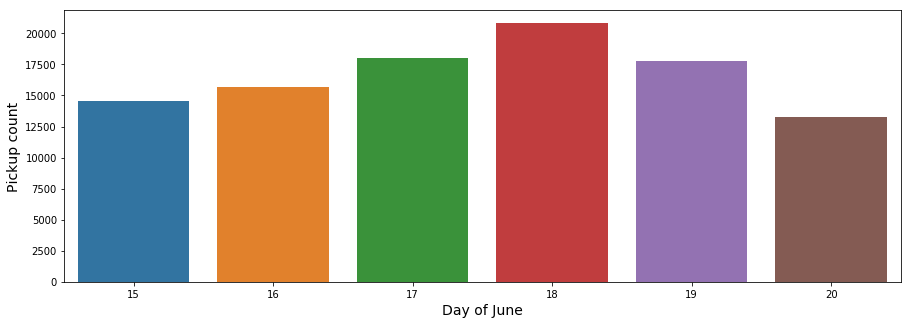

In [10]:
f = plt.figure(figsize=(15,5))
sns.countplot(x='day', data=df)
plt.xlabel('Day of June', fontsize=14)
plt.ylabel('Pickup count', fontsize=14)
plt.show()


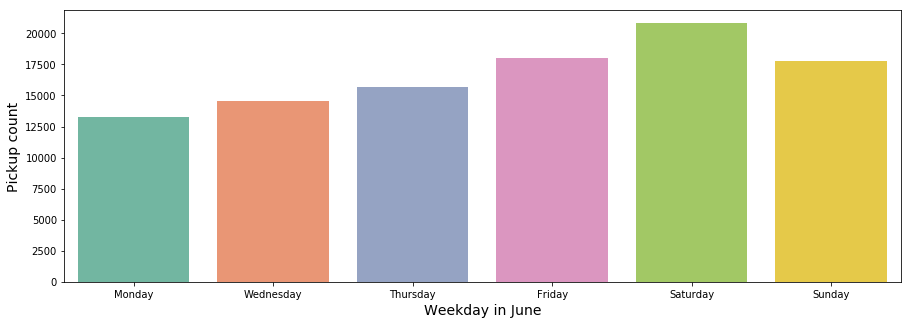

In [11]:

values_week = ['Monday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

f, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
sns.countplot(x='weekday', data=df, palette='Set2')
plt.xlabel('Weekday in June', fontsize=14)
plt.ylabel('Pickup count', fontsize=14)
axes.set_xticklabels(values_week)

plt.show()

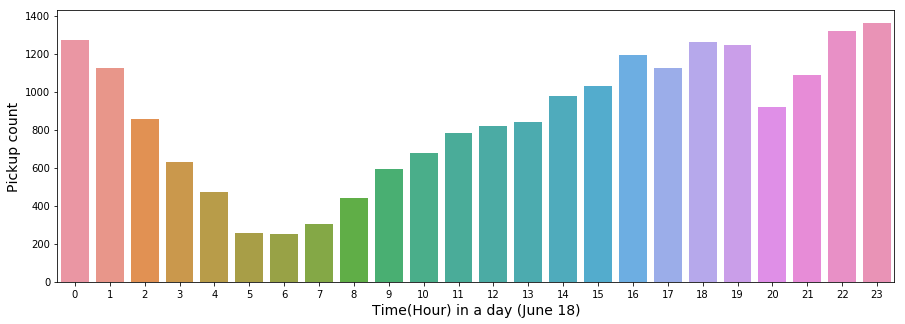

In [12]:
f = plt.figure(figsize=(15,5))
sns.countplot(x='hour', data=df[df['day']==18])
plt.xlabel('Time(Hour) in a day (June 18)', fontsize=14)
plt.ylabel('Pickup count', fontsize=14)
plt.show()

### Visualize the trip durations (unit: minute)

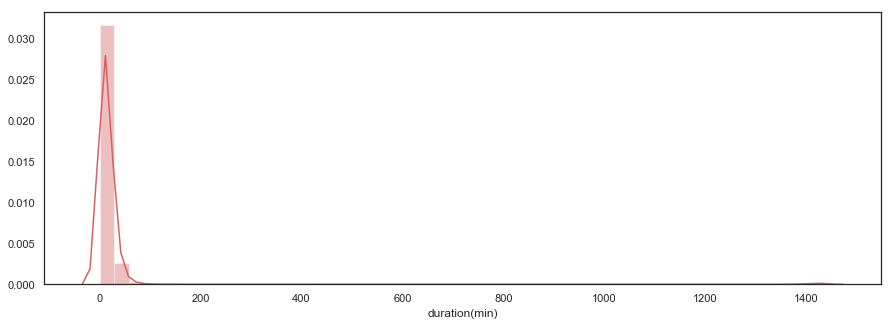

In [13]:
f = plt.figure(figsize=(15,5))
sns.set(style="white", palette="muted", color_codes=True)
sns.distplot(df['duration'], axlabel = 'duration(min)', label = 'duration', color="r")

Try to use log function to flat the distribution

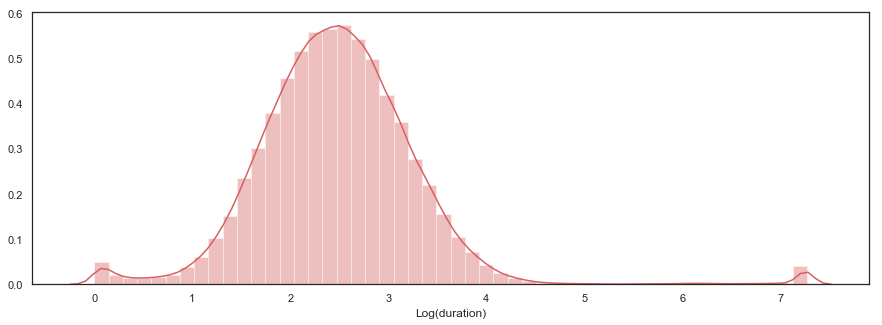

In [14]:
f = plt.figure(figsize=(15,5))
sns.distplot(np.log(df['duration'].values+1), axlabel = 'Log(duration)', label = 'log(duration)', color="r")

### Visualize the mean trip duration changes over time from different vendors

In [15]:
df['VendorID'].unique()

array([2, 1])

In [16]:
df_v1 = pd.DataFrame(df[df['VendorID']==1].groupby('day')['duration'].mean())
df_v1.reset_index(inplace = True)
df_v2 = pd.DataFrame(df[df['VendorID']==2].groupby('day')['duration'].mean())
df_v2.reset_index(inplace = True)

In [17]:
df_v1['VendorID'] = ['vendor_1'] * df_v1.shape[0]
df_v2['VendorID'] = ['vendor_2'] * df_v2.shape[0]
df_v1and2 = df_v1.copy()
df_v1and2 = df_v1and2.append(df_v2)

In [18]:
df_v1.head()

,day,duration,VendorID
0,15,13.852144,vendor_1
1,16,14.534665,vendor_1
2,17,13.925629,vendor_1
3,18,13.488258,vendor_1
4,19,12.817184,vendor_1


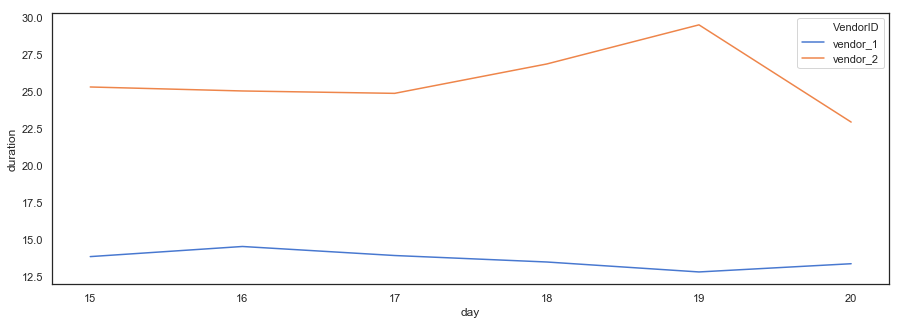

In [19]:
f = plt.figure(figsize=(15,5))
sns.lineplot(data=df_v1and2, x='day', y='duration', hue='VendorID')

### Feature relationship

In [20]:
df2 = df.copy()
df2['duration']= np.log(df['duration']+1)

df2 = df2.dropna(subset=['Passenger_count']) 

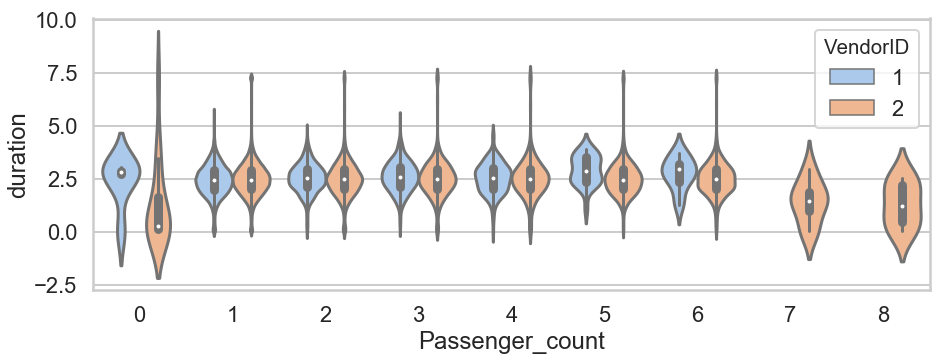

In [21]:
f = plt.figure(figsize=(15,5))
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.set_context("poster")

sns.violinplot(x="Passenger_count", y="duration", hue="VendorID", data=df2,)


### Visualize the trips change over locations

In [22]:
import folium
from folium import plugins

In [23]:
monday_trips = pd.DataFrame(df[df['weekday']==0][['Pickup_latitude', 'Pickup_longitude', 'Dropoff_latitude', 'Dropoff_longitude', 'hour']])


#### Heatmap
Density of Monday Pick-up and Drop-off

The libraray `folium` (based on js library `leaflet`) is not using Kernal Density Estimate (KDE), but shows every data point as a blurred circle.

In [24]:
# Create Monday Map
# latitude first, then longitude
monday = folium.Map([40.67, -73.97], zoom_start=10)
# Add heatMap 
plugins.HeatMap(monday_trips[['Pickup_latitude', 'Pickup_longitude']].values, radius=15).add_to(monday)
# Print heatMap
monday

In [25]:
monday_drop_off = folium.Map([40.67, -73.97], zoom_start=10)
plugins.HeatMap(monday_trips[['Dropoff_latitude', 'Dropoff_longitude']].values, radius=15).add_to(monday_drop_off)
# Print heatMap
monday_drop_off

## US map

In [26]:
us_df = pd.read_csv(filepath_or_buffer="US_Unemployment_Oct2012.csv",sep=',',
                         header=0, index_col=None, lineterminator='\n')
print(us_df.shape)

(50, 2)


### Different color scale for choropleth map
We are still using `folium` library here. `plotly`(https://plot.ly/python/choropleth-maps/) also provides functions for rendering choropleth map.

in the following code, 'YlGn' is a palette from `RColorBrewer palettes`

In [27]:
# Initialize the map:
m = folium.Map(location=[37, -102], zoom_start=3)
 
# Add the color for the choropleth:
m.choropleth(
 geo_data='us-states.json',
 name='choropleth',
 data=us_df,
 columns=['State', 'Unemployment'],
 key_on='feature.id',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Unemployment Rate (%)'
)
folium.LayerControl().add_to(m)
m

/usr/local/lib/python3.7/site-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [28]:
unemployment = us_df['Unemployment'].values
stops = [
    np.quantile(unemployment, 0),
    np.quantile(unemployment, .25),
    np.quantile(unemployment, .5),
    np.quantile(unemployment, .75),
    np.quantile(unemployment, 1),
]

In [29]:
m2 = folium.Map(location=[37, -102], zoom_start=3)
 
m2.choropleth(
 geo_data='us-states.json',
 name='choropleth',
 data=us_df,
 columns=['State', 'Unemployment'],
 key_on='feature.id',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Unemployment Rate (%)',
 threshold_scale=stops
)
folium.LayerControl().add_to(m2)
m2

## Dot map

The chart below is basically a scatterplot of pick-up locations. 

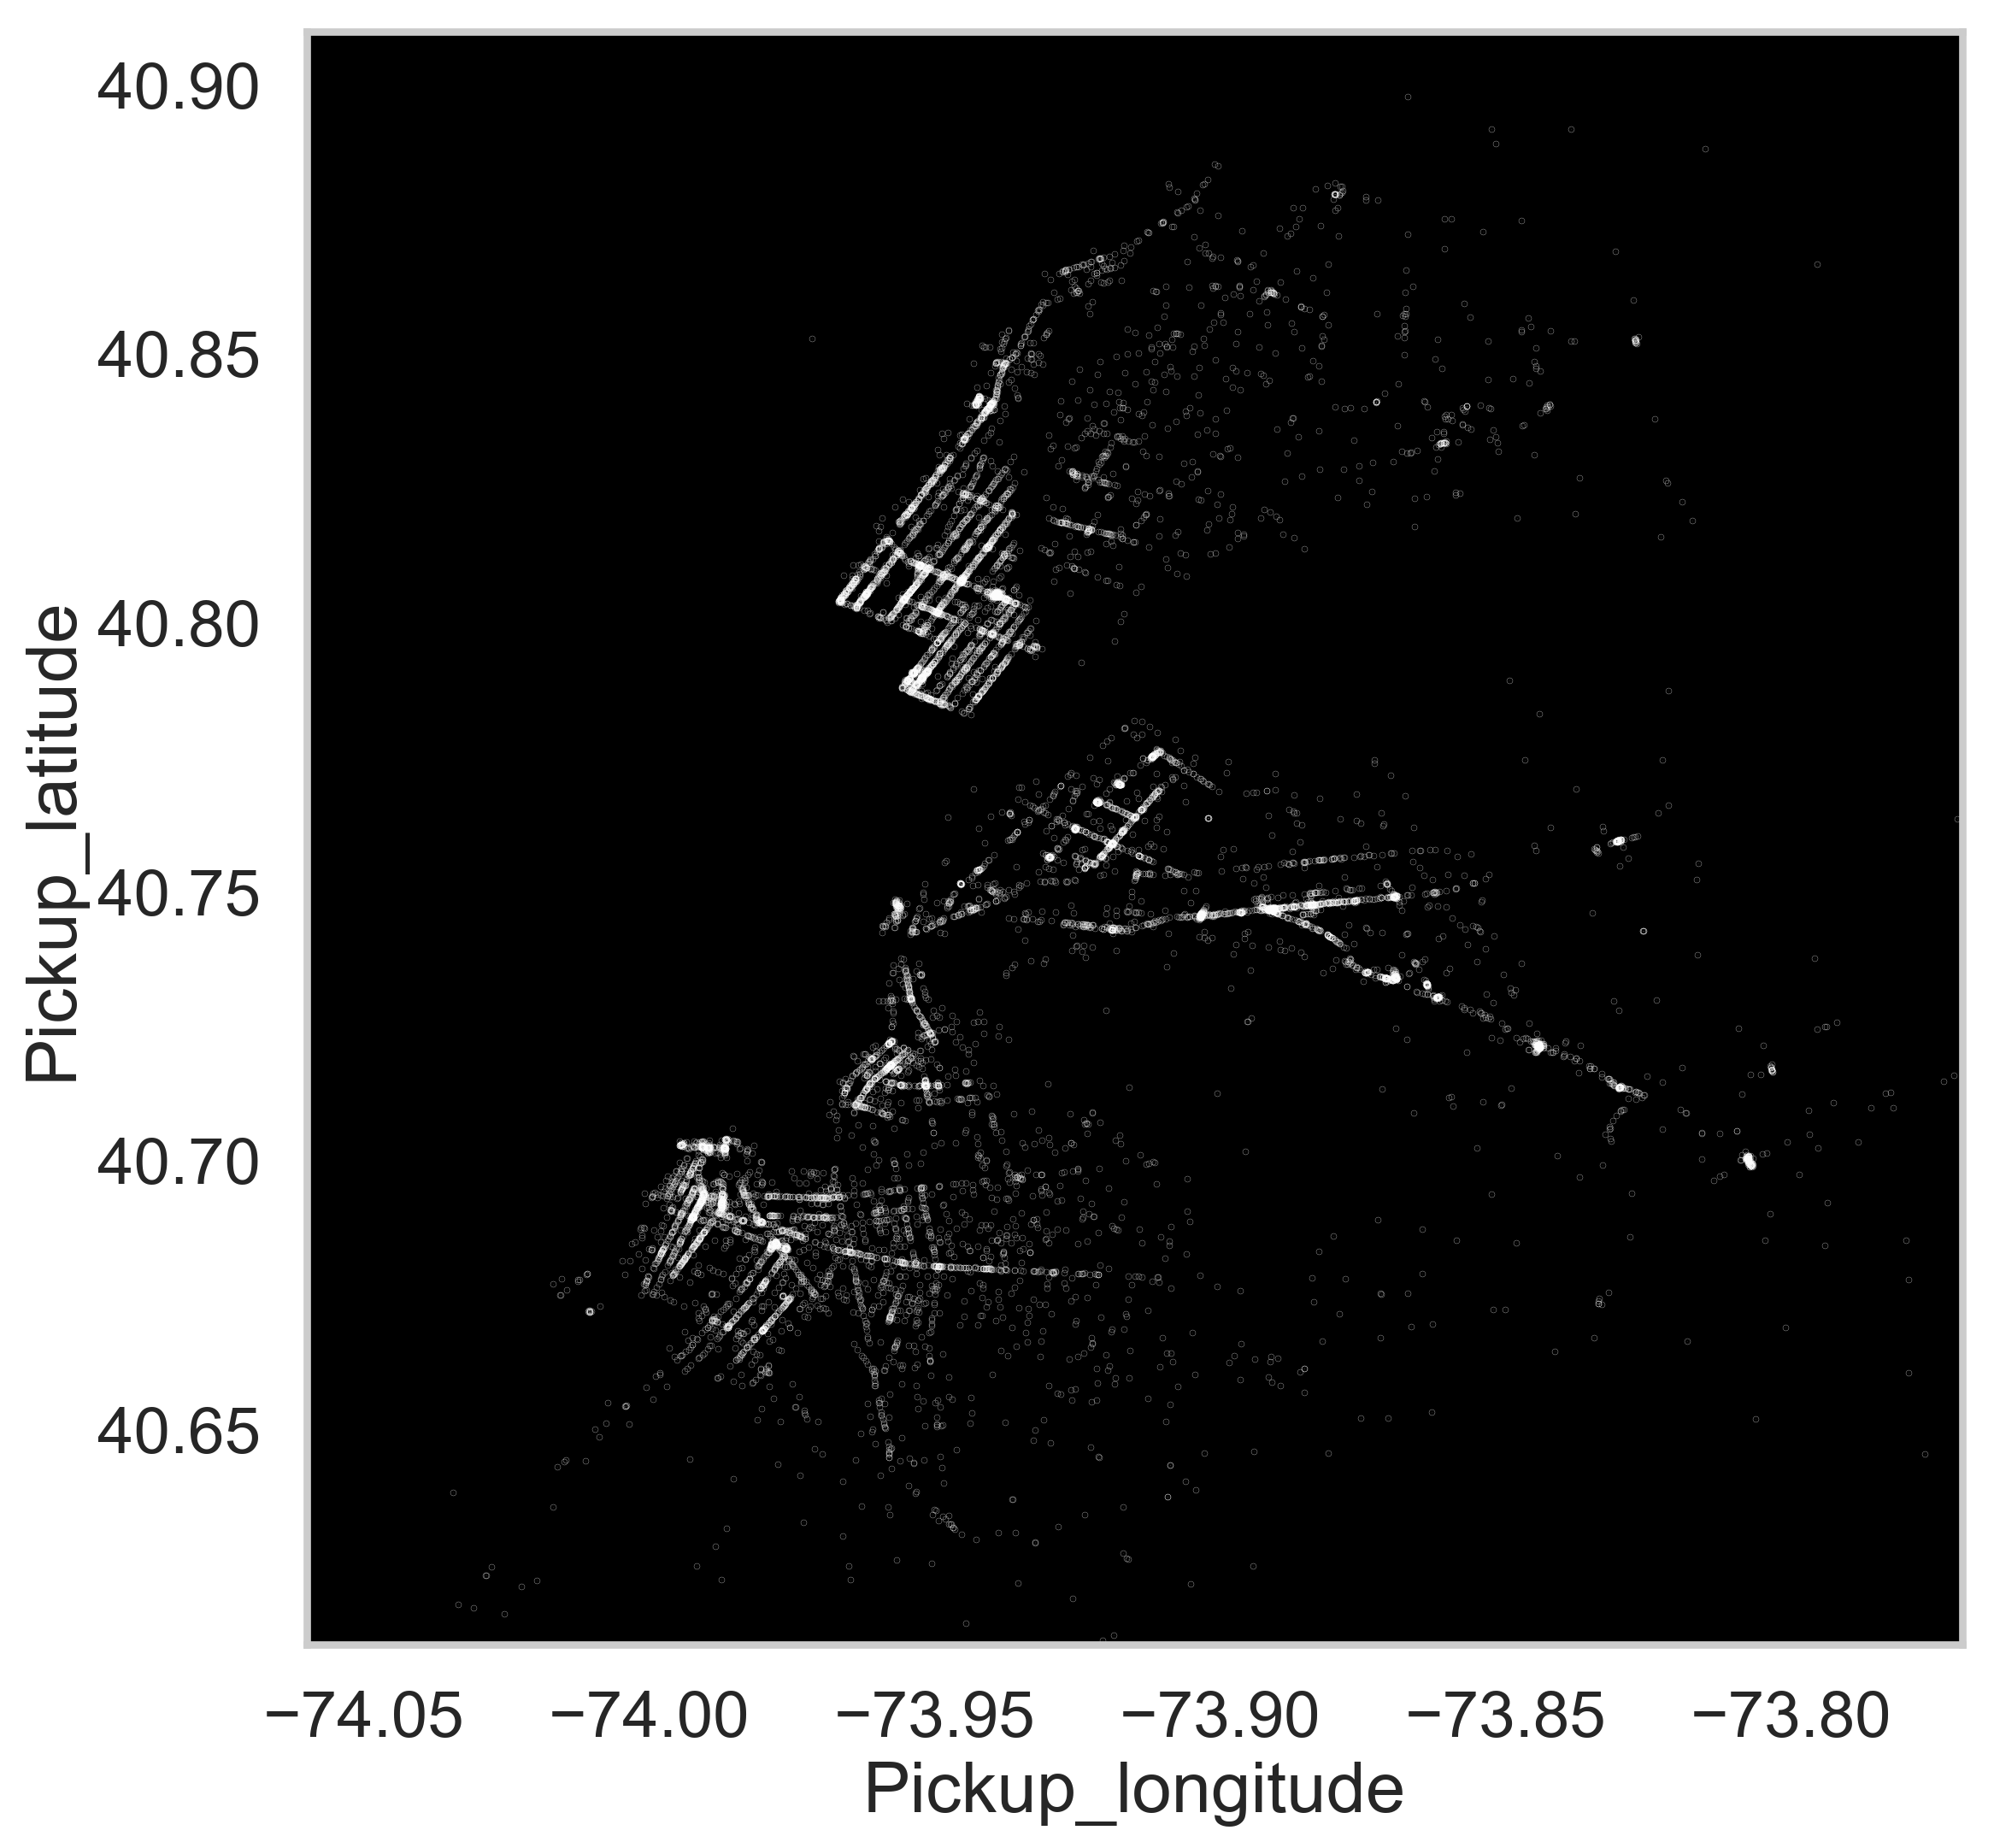

In [43]:
from matplotlib import rcParams  
rcParams['figure.figsize'] = (10, 10) #Size of figure  
rcParams['figure.dpi'] = 250

p = monday_trips.plot(kind='scatter', x='Pickup_longitude', y='Pickup_latitude',color='white',xlim=(-74.06,-73.77),ylim=(40.61, 40.91),s=.02,alpha=.6)
p.set_facecolor((0.0, 0.0, 0.0))
p.grid(False)

In [39]:
from matplotlib import animation

In [40]:
trips16to17 = pd.DataFrame(df[(df['day']==16) | (df['day']==17)][['Pickup_latitude', 'Pickup_longitude', 'Dropoff_latitude', 'Dropoff_longitude', 'hour', 'day']])



/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


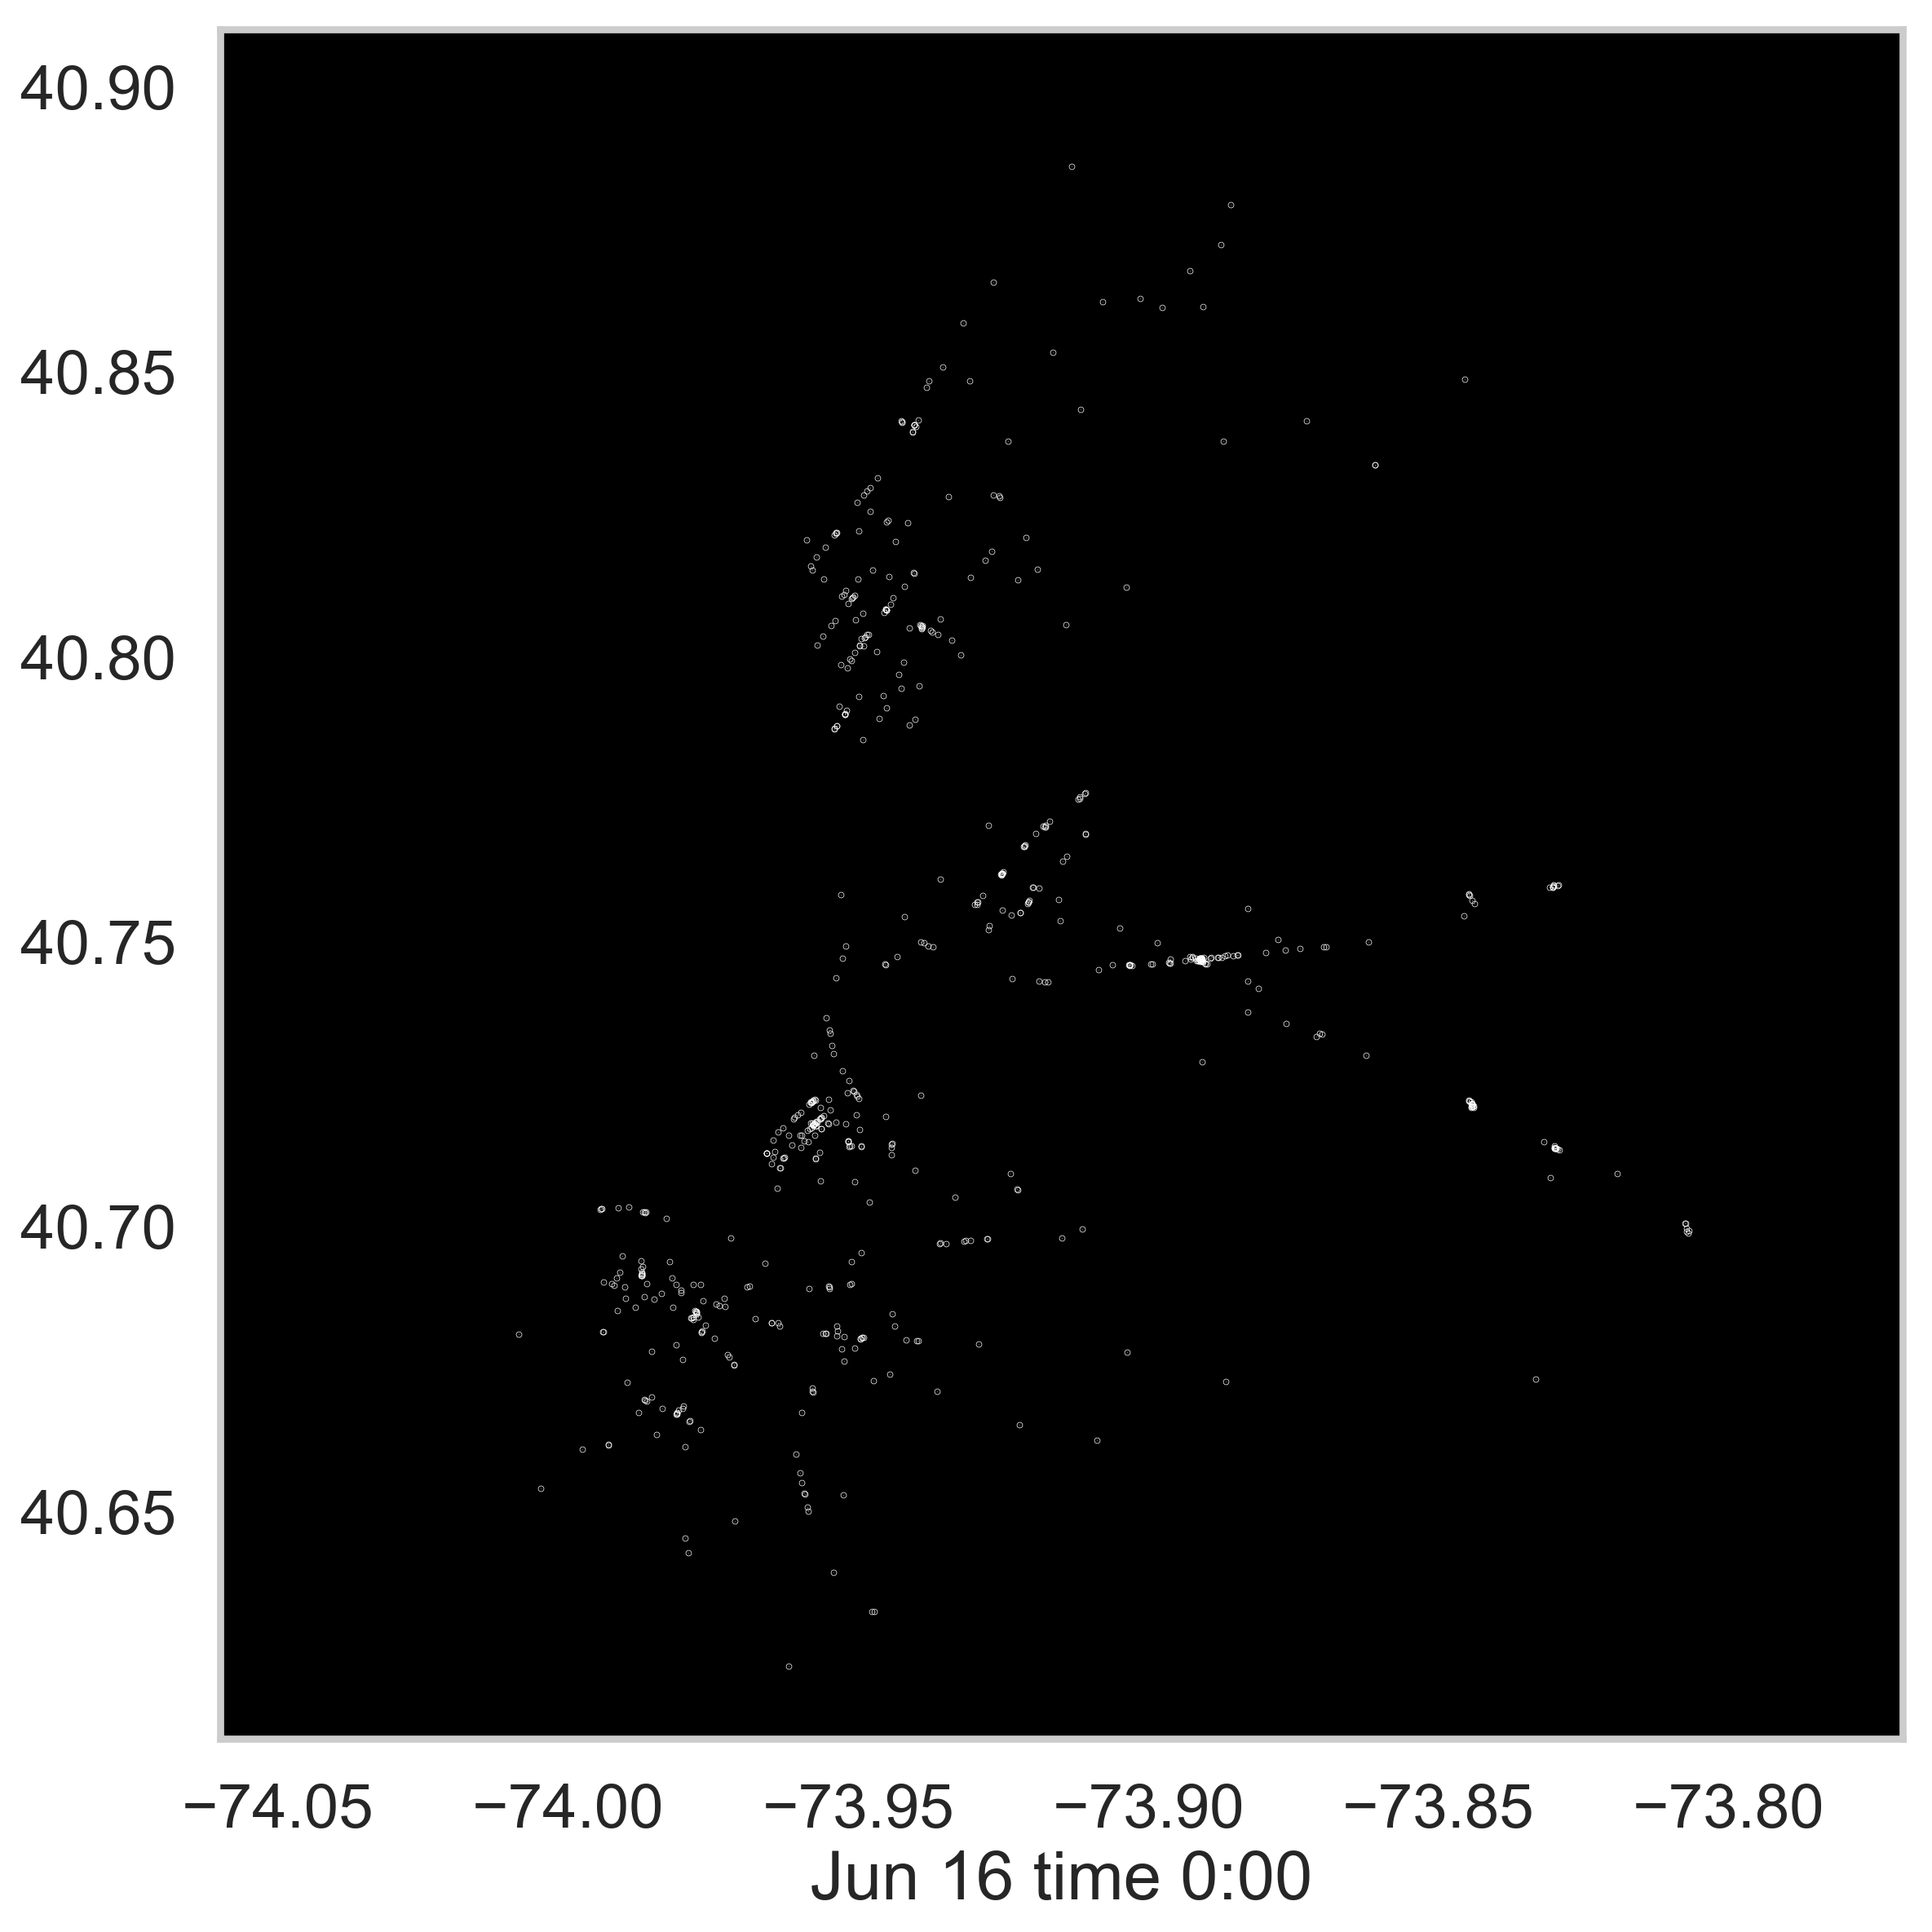

In [45]:
fig, ax = plt.subplots()
rcParams['figure.figsize'] = (10, 10) 
fig.set_tight_layout(True)

def update(i):
    label = 'Jun {0} time {1}:00'.format(int(16+np.floor(i/24)), i%24)
    pick = trips16to17[(trips16to17['hour']==(i%24)) & (trips16to17['day']==(16+np.floor(i/24)))]
    ax.clear()
    plot = ax.scatter(pick['Pickup_longitude'].values, pick['Pickup_latitude'].values, c=[[1,1,1,0.9]], s=.05)
    ax.set_xlim([-74.06,-73.77])
    ax.set_ylim([40.61,40.91])
    ax.set_facecolor("black")
    ax.set_xlabel(label)
    ax.grid(False)    
    return plot

anim = animation.FuncAnimation(fig, update, frames=np.arange(0, 48), interval=300)
anim.save('june1617.gif', writer='imagemagick')
